### Import Modules & Packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Read Images and Create Label

In [2]:
SIZE = 224  #Resize images

In [3]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for folder in os.listdir('train'):
    for file in os.listdir(os.path.join('train', folder)):
        if (file.endswith("JPG") or file.endswith("jpg")):
            train_labels.append(folder)
            img = cv2.imread(os.path.join('train', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            train_images.append(im)
        else:
            continue

        #Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [4]:
print('train images shape =',train_images.shape)
print('train labels shape =',train_labels.shape)

train images shape = (105, 224, 224, 3)
train labels shape = (105,)


In [5]:
test_images = []
test_labels = [] 

for folder in os.listdir('test'):
    for file in os.listdir(os.path.join('test', folder)):
        if (file.endswith("JPG") or file.endswith("jpg")):
            test_labels.append(folder)
            img = cv2.imread(os.path.join('test', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            test_images.append(im)
        else:
            continue


        #Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
print('test images shape =',test_images.shape)
print('test labels shape =',test_labels.shape)

test images shape = (15, 224, 224, 3)
test labels shape = (15,)


### Conversion to numerical values

In [8]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_labels)
y_train = to_categorical(y_train,4)
X_train = train_images/255

In [9]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(test_labels)
y_test = to_categorical(y_test ,4)
X_test = test_images/255

### Normalize Data

### Train - Test Split

In [10]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test

### Training Neural Networks

In [14]:
from keras.models import Sequential  
from keras.layers import Dense,Flatten,Dropout  
from keras.layers.convolutional import Conv2D,MaxPooling2D  
from keras.utils.np_utils import to_categorical  
import numpy as np  
seed = 7  
np.random.seed(seed)  

model = Sequential()  
model.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(224,224,3),padding='valid',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Flatten())  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4096,activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(4,activation='softmax'))  

### Creating more Training images (to prevent overfitting)

In [15]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

### Compile

In [16]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_test,y_test),
    verbose = 1
)

Epoch 1/64
4/4 [==============================] - 13s 3s/step - loss: 1.3911 - accuracy: 0.2814 - val_loss: 1.4344 - val_accuracy: 0.4000
Epoch 2/64
4/4 [==============================] - 3s 692ms/step - loss: 1.3229 - accuracy: 0.3178 - val_loss: 1.2483 - val_accuracy: 0.3333
Epoch 3/64
4/4 [==============================] - 3s 822ms/step - loss: 1.2124 - accuracy: 0.2373 - val_loss: 1.1102 - val_accuracy: 0.4000
Epoch 4/64
4/4 [==============================] - 3s 698ms/step - loss: 1.1590 - accuracy: 0.3607 - val_loss: 1.1051 - val_accuracy: 0.3333
Epoch 5/64
4/4 [==============================] - 3s 697ms/step - loss: 1.1120 - accuracy: 0.3451 - val_loss: 1.0867 - val_accuracy: 0.3333
Epoch 6/64
4/4 [==============================] - 3s 692ms/step - loss: 1.1491 - accuracy: 0.3108 - val_loss: 1.1175 - val_accuracy: 0.3333
Epoch 7/64
4/4 [==============================] - 3s 697ms/step - loss: 1.0846 - accuracy: 0.3718 - val_loss: 1.0724 - val_accuracy: 0.4000
Epoch 8/64
4/4 [======

### Outcome

In [102]:
print(y_test)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [103]:
original=[]

In [107]:
import numpy as np 

for i in range(len(y_test)):
    
    maxElement = np.amax(y_test[i])
    if(y_test[i][0]==maxElement):
        original.append('Blight')
        
    elif(y_test[i][1]==maxElement):
        original.append('Common_Rust')
        
    elif(y_test[i][2]==maxElement):
        original.append('Gray_Leaf_Spot')
           
 

In [108]:
original = np.array(original)

In [109]:
print(original)

['Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Common_Rust' 'Common_Rust'
 'Common_Rust' 'Common_Rust' 'Common_Rust' 'Gray_Leaf_Spot'
 'Gray_Leaf_Spot' 'Gray_Leaf_Spot' 'Gray_Leaf_Spot' 'Gray_Leaf_Spot']


In [111]:
prediction = model.predict(X_test)

In [112]:
print(prediction)

[[7.25981414e-01 2.73977965e-01 3.96429095e-05 9.76157480e-07]
 [9.86916542e-01 1.29873296e-02 9.22406543e-05 3.87772570e-06]
 [6.41277671e-01 3.58631968e-01 8.80987645e-05 2.23126244e-06]
 [9.82708395e-01 1.72772445e-02 1.40254633e-05 3.73081832e-07]
 [9.33885932e-01 6.51335493e-02 9.30935901e-04 4.95764543e-05]
 [1.06899817e-04 9.60214317e-01 3.96776907e-02 1.09206337e-06]
 [3.76832722e-05 9.58694637e-01 4.12669219e-02 7.44170222e-07]
 [3.85340117e-03 2.19815284e-01 7.76272714e-01 5.85814414e-05]
 [6.47414997e-02 9.24365520e-01 1.07588638e-02 1.34142887e-04]
 [3.63433398e-02 9.60814834e-01 2.80853081e-03 3.32724157e-05]
 [6.45167966e-05 8.47582668e-02 9.15173352e-01 3.86322972e-06]
 [1.13270245e-04 1.51065066e-01 8.48815560e-01 6.06210642e-06]
 [1.43740948e-08 4.35239449e-03 9.95647609e-01 1.72667791e-09]
 [8.20270419e-01 1.34705886e-01 4.38637137e-02 1.15994201e-03]
 [1.10260800e-09 1.31658249e-04 9.99868274e-01 2.25117217e-11]]


In [114]:
predict=[]

In [115]:
import numpy as np 
i=0

for i in range(len(prediction)):
    
    maxElement = np.amax(prediction[i])
    if(prediction[i][0]==maxElement):
        predict.append('Blight')
        
    elif(prediction[i][1]==maxElement):
        predict.append('Common_Rust')
        
    elif(prediction[i][2]==maxElement):
        predict.append('Gray_Leaf_Spot')
           


In [116]:
predict = np.array(predict)

In [117]:
predict.shape

(15,)

In [118]:
print(predict)

['Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Common_Rust' 'Common_Rust'
 'Gray_Leaf_Spot' 'Common_Rust' 'Common_Rust' 'Gray_Leaf_Spot'
 'Gray_Leaf_Spot' 'Gray_Leaf_Spot' 'Blight' 'Gray_Leaf_Spot']


In [122]:
true = 0
false = 0
for i in range(len(y_test)):
    if(predict[i]==original[i]):
        true=true+1
    else:
        false=false+1
        
print('true =',true)
print('false=',false)

true = 13
false= 2


In [123]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(original, predict))

Accuracy =  0.8666666666666667


In [125]:
import seaborn as sns

<AxesSubplot:>

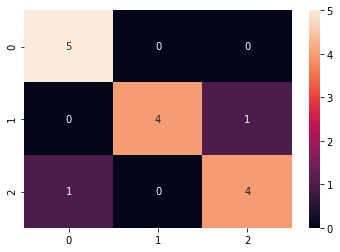

In [126]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, predict)
#print(cm)
sns.heatmap(cm, annot=True)

In [127]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
target_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot']
print("Classification Report: \n",classification_report(original, predict, target_names=target_names))

Classification Report: 
                 precision    recall  f1-score   support

        Blight       0.83      1.00      0.91         5
   Common_Rust       1.00      0.80      0.89         5
Gray_Leaf_Spot       0.80      0.80      0.80         5

      accuracy                           0.87        15
     macro avg       0.88      0.87      0.87        15
  weighted avg       0.88      0.87      0.87        15



In [128]:
##now connect zf net with random forst (train sector)

In [150]:
print(y_train.shape)

(105, 4)


In [151]:
y_train_rf=[]


import numpy as np 

for i in range(len(y_train)):
    
    maxElement = np.amax(y_train[i])
    if(y_train[i][0]==maxElement):
        y_train_rf.append('Blight')
        
    elif(y_train[i][1]==maxElement):
        y_train_rf.append('Common_Rust')
        
    elif(y_train[i][2]==maxElement):
        y_train_rf.append('Gray_Leaf_Spot')
        
        
y_train_rf = np.array(y_train_rf)
print(y_train_rf.shape)

(105,)


In [152]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y_train_rf)
train_labels_encoded = le.transform(y_train_rf)
#it make the data calass name to numerical formate like 1,2,3,4 for calculation purpose

In [153]:
print(train_labels_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [154]:
#Now, let us use features from convolutional network for RF( we send oure input deta throw this feature extracture)
feature_extractor=model.predict(X_train)

In [155]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1) #reshape is for random forest it will be 2d arry
X_for_RF = features #This is our X input to RF (random forest)

In [156]:
X_train_RF, y_train_RF = X_for_RF, train_labels_encoded

In [157]:
#############################################################################################################################################
#RANDOM FOREST (it is classifiare problem not a regrassion problem nost use random forest regrassion) # n_estimators 50 mens it will generate 50 tree
# you can use another classifire module there like decition tree svm etc
from sklearn.ensemble import RandomForestClassifier 
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 40)
###############################################################################################################################################

In [158]:
# Train the model on training data
#For sklearn no one hot encoding x_for_rf random forest y_train (are level value)
RF_model.fit(X_train_RF, train_labels_encoded) 

RandomForestClassifier(n_estimators=50, random_state=40)

In [159]:
##now connect zf net with random forst (test sector)
#here X_test_features (x_test)#########and####### original(y_test)

In [161]:
X_test_feature = model.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [162]:
X_test_features.shape

(15, 4)

In [163]:
print(X_test_features)

[[7.25981414e-01 2.73977965e-01 3.96429095e-05 9.76157480e-07]
 [9.86916542e-01 1.29873296e-02 9.22406543e-05 3.87772570e-06]
 [6.41277671e-01 3.58631968e-01 8.80987645e-05 2.23126244e-06]
 [9.82708395e-01 1.72772445e-02 1.40254633e-05 3.73081832e-07]
 [9.33885932e-01 6.51335493e-02 9.30935901e-04 4.95764543e-05]
 [1.06899817e-04 9.60214317e-01 3.96776907e-02 1.09206337e-06]
 [3.76832722e-05 9.58694637e-01 4.12669219e-02 7.44170222e-07]
 [3.85340117e-03 2.19815284e-01 7.76272714e-01 5.85814414e-05]
 [6.47414997e-02 9.24365520e-01 1.07588638e-02 1.34142887e-04]
 [3.63433398e-02 9.60814834e-01 2.80853081e-03 3.32724157e-05]
 [6.45167966e-05 8.47582668e-02 9.15173352e-01 3.86322972e-06]
 [1.13270245e-04 1.51065066e-01 8.48815560e-01 6.06210642e-06]
 [1.43740948e-08 4.35239449e-03 9.95647609e-01 1.72667791e-09]
 [8.20270419e-01 1.34705886e-01 4.38637137e-02 1.15994201e-03]
 [1.10260800e-09 1.31658249e-04 9.99868274e-01 2.25117217e-11]]


In [164]:
prediction_RF = RF_model.predict(X_test_features)

In [165]:
prediction_RF.shape

(15,)

In [166]:
print(prediction_RF)

[0 0 0 0 0 1 1 2 1 1 2 2 2 0 2]


In [167]:
prediction_RF = le.inverse_transform(prediction_RF)

In [168]:
print(prediction_RF)

['Blight' 'Blight' 'Blight' 'Blight' 'Blight' 'Common_Rust' 'Common_Rust'
 'Gray_Leaf_Spot' 'Common_Rust' 'Common_Rust' 'Gray_Leaf_Spot'
 'Gray_Leaf_Spot' 'Gray_Leaf_Spot' 'Blight' 'Gray_Leaf_Spot']


In [169]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(original, prediction_RF)) #provide test and prediction data to measure that

Accuracy =  0.8666666666666667


<AxesSubplot:>

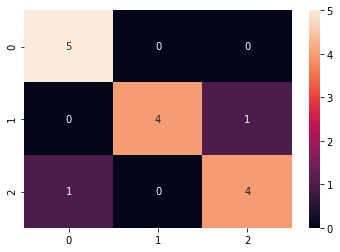

In [170]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

In [172]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
target_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot']
print("Classification Report: \n",classification_report(original, prediction_RF, target_names=target_names))

Classification Report: 
                 precision    recall  f1-score   support

        Blight       0.83      1.00      0.91         5
   Common_Rust       1.00      0.80      0.89         5
Gray_Leaf_Spot       0.80      0.80      0.80         5

      accuracy                           0.87        15
     macro avg       0.88      0.87      0.87        15
  weighted avg       0.88      0.87      0.87        15



In [173]:
true = 0
false = 0
for i in range(len(y_test)):
    if(predict[i]==original[i]):
        true=true+1
    else:
        false=false+1
        
print('true =',true)
print('false=',false)

true = 13
false= 2
